In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno 

In [3]:
df = pd.read_csv("./data/dataset_Facebook.csv", delimiter=';')
df.head(4)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777


In [4]:
print(df.shape)
print(df.columns.values)

(500, 19)
['Page total likes' 'Type' 'Category' 'Post Month' 'Post Weekday'
 'Post Hour' 'Paid' 'Lifetime Post Total Reach'
 'Lifetime Post Total Impressions' 'Lifetime Engaged Users'
 'Lifetime Post Consumers' 'Lifetime Post Consumptions'
 'Lifetime Post Impressions by people who have liked your Page'
 'Lifetime Post reach by people who like your Page'
 'Lifetime People who have liked your Page and engaged with your post'
 'comment' 'like' 'share' 'Total Interactions']


#### Check the presence of missing values in the matrix

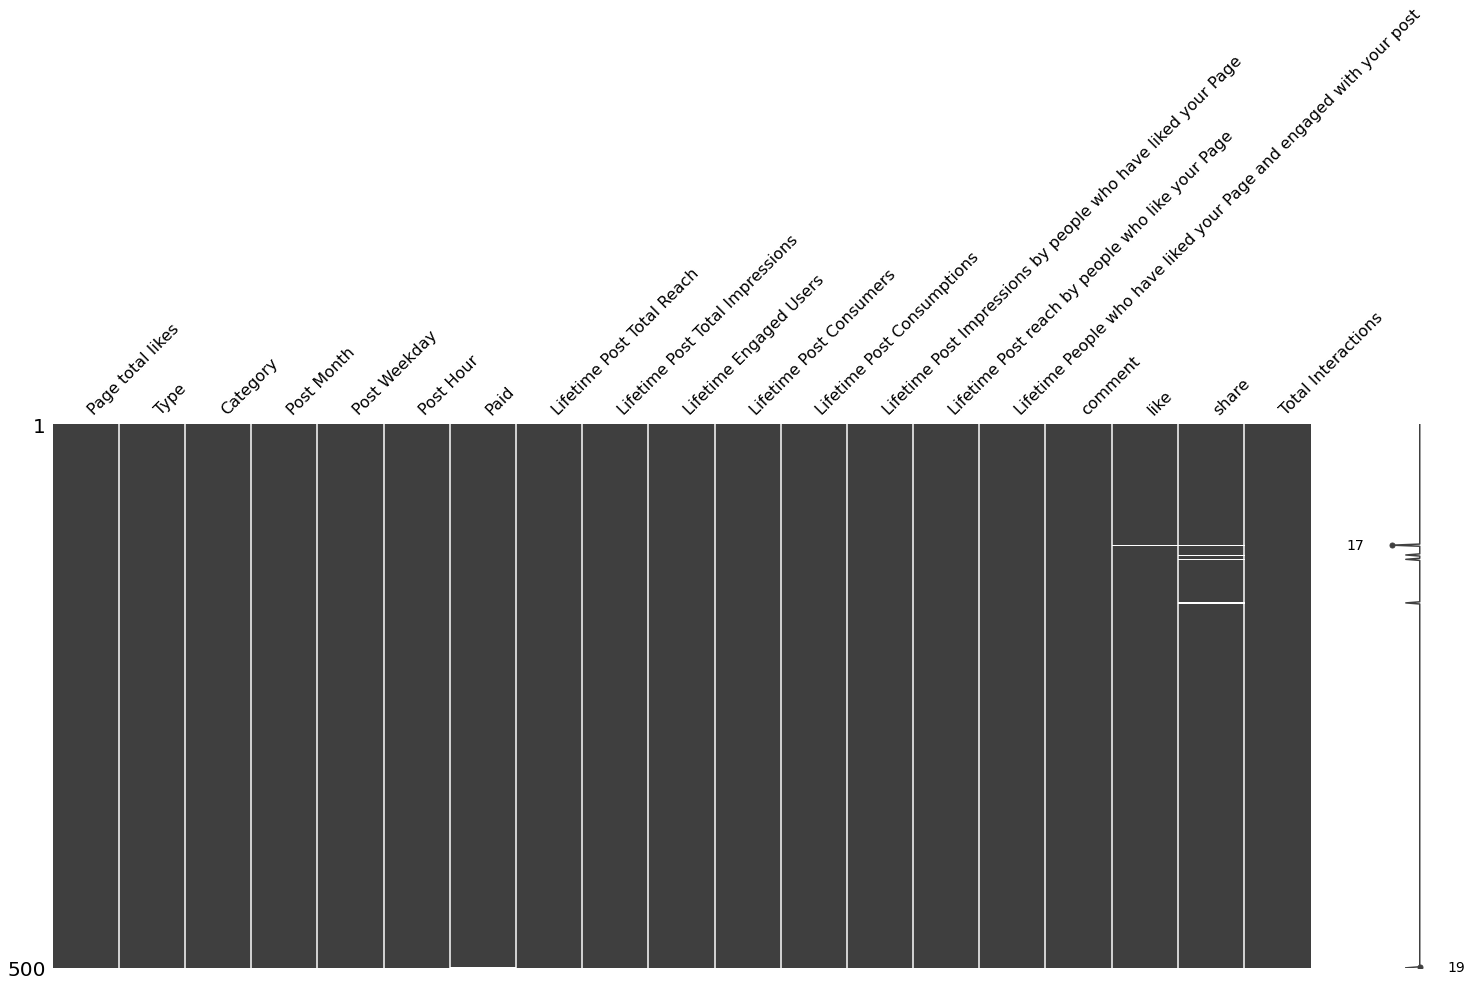

In [5]:
msno.matrix(df) 

#### We will substitute the missing values of like and share columns by the mean values

In [29]:
# train_df['Age'].fillna(value=np.nanmean(train_df['Age'].values),inplace=True)
median_share = df["share"].median() 
df["share"].fillna(median_share, inplace=True)
print(df['share'].values)
#df['like'].describe()

median_like = df["like"].median() 
df["like"].fillna(median_like, inplace=True)

[ 17.  29.  14. 147.  49.  33.  27.  14.  31.  26.  19.  18.  14.  10.
  20.  18.  12.  20.  17.   8.  12.   0.   2.  24.  19.  18.  72.  17.
  63.  13.  22.  11.  47.  23.  17.  21.  17.   8.  31.  14.  39.  18.
   3.  10.  11.  10.  36.   8.  15.   1.   9.  28.  31.  19.  13.  14.
  54.  13.  11.  17.  14.  10.  13.  22.   7.  23.   7.  70.  17.  28.
   9.  84.  44.  47.  13.  74.   0.   8.   8.   7.  13.  53.  57.  19.
  16.   8.  31.  38.   6.  17.  77.  13.  32.  16.  22.  27.  11.  26.
  61.  90.   0.  95.  14.   4.   9. 139.  32.  28.  16.  50.   4.  19.
  18.  16.   2.   2.  26.   0.   2.   2.  19.  40.   2.   2.  19.   2.
  41.   1.   1.   0.   2.   3.   2.   1.   4.  12.  16.   3.  25.  19.
  44.  36.  90.  60.   9.  14.  15.  14.  28.  11.  41.  32.  49.  25.
  55.  16.  30.  21.  35.  13.  40.  32.  98.  41.  19.  19.   5.  64.
 208.  16.  26.   6.  27.  40.  34.  22.  98.  40.  42.  36.  29.   8.
  44. 121.  11.  10.  35.   6.  12.  15.  15.  43.   7.  17.  42.  43.
   7. 

In [7]:
# df['share'].fillna(value=df.share.mode(),inplace=True)
# train_df['Age'].fillna(value=np.nanmean(train_df['Age'].values),inplace=True)
# print(mode(df['share']))

#mode = df['share'].mode()
#print(mode)

In [30]:
df['share'].describe()

count    500.000000
mean      27.200000
std       42.448554
min        0.000000
25%       10.000000
50%       19.000000
75%       32.000000
max      790.000000
Name: share, dtype: float64

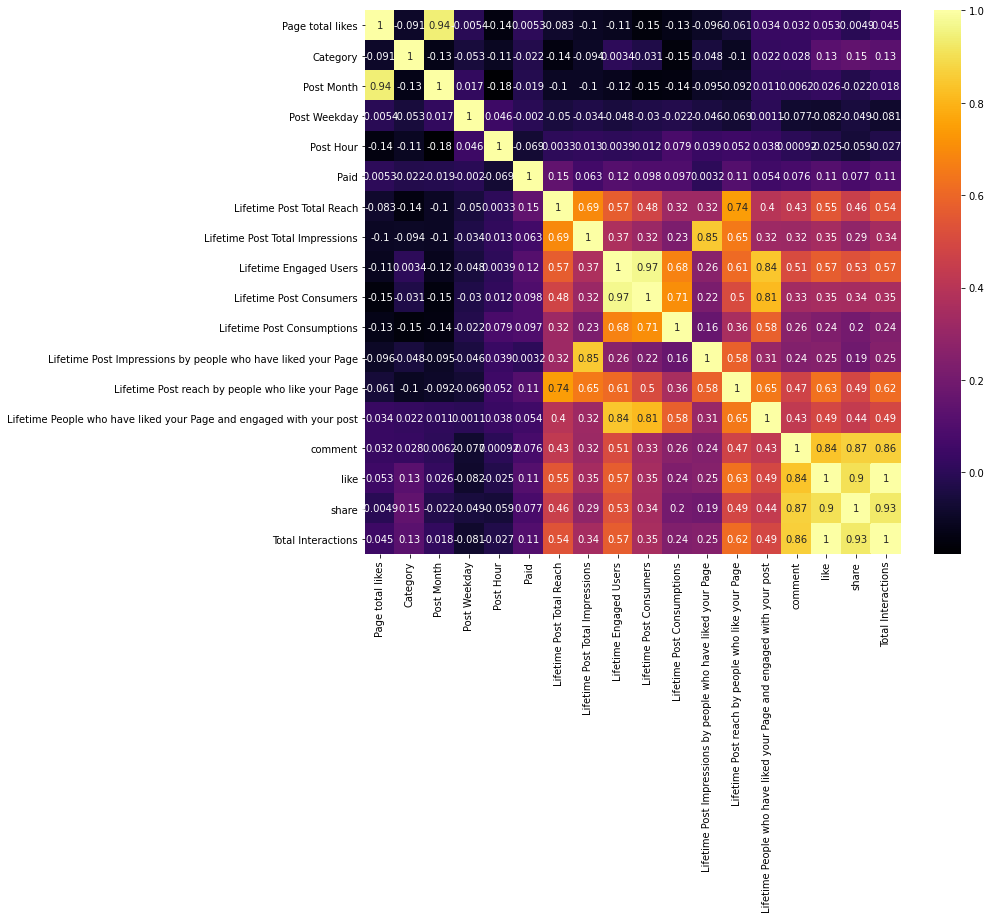

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='inferno',annot=True,cbar=True)

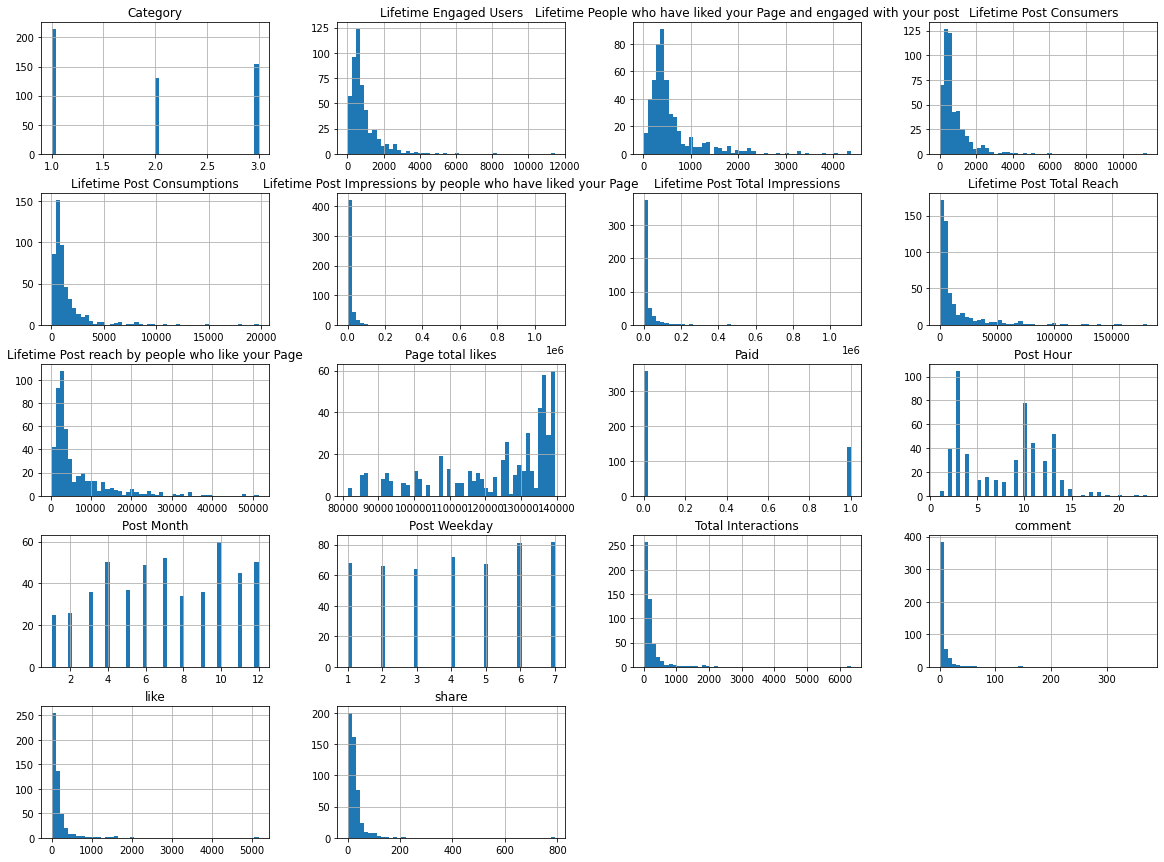

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

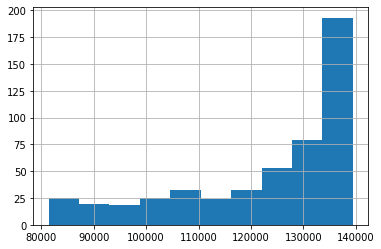

In [12]:
df["Page total likes"].hist()
plt.show()

In [17]:
df["Nr_Likes_Cat"] = pd.cut(df["Page total likes"],
                               bins=[80000, 90000, 100000, 1100000, 1200000, 1300000, 1400000, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])

In [18]:
df["Nr_Likes_Cat"].value_counts()

3    438
2     37
1     25
7      0
6      0
5      0
4      0
Name: Nr_Likes_Cat, dtype: int64

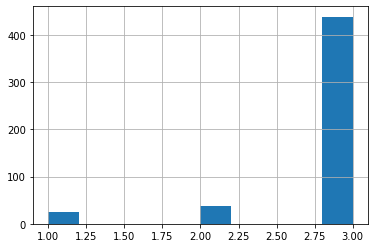

In [19]:
df["Nr Likes Category"].hist()
plt.show()

In [31]:
df["like_per_share"] = df["like"]/df["share"]

In [27]:
df["like_per_share"]

0       4.647059
1       4.482759
2       4.714286
3      10.693878
4       6.632653
         ...    
495     2.038462
496     2.409091
497     5.166667
498     2.394737
499     3.250000
Name: like_per_share, Length: 500, dtype: float64

ValueError: supplied range of [0.10526315789473684, inf] is not finite

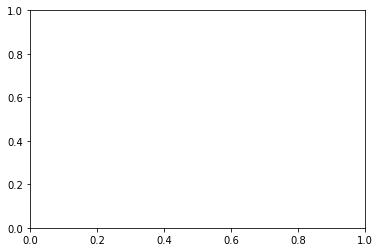

In [35]:
df['Type'].value_counts() # It has to be converted into numerical values

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

Type_cat = df[["Type"]]
type_encoded = ordinal_encoder.fit_transform(Type_cat)
type_encoded[:10]

array([[1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.]])